# Handshake Data Analysis:

**Understanding the Total Addressable Market of potential diverse STEM employees**

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark-palette')
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv('main_df.csv')
df.head()

,YEAR,MULTYEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STATEFIP,STRATA,GQ,...,INCWAGE,State,under_represented,domestic_born,EDU_verbose,is_STEM_degree,Degree,Degree_D,JobRole,stemType
0,2020,2016,202003,6676264,2016000978820,5.15,2020066762643,55,10055,1,...,51776,Wisconsin,0,1,High School,0,NaN,NaN,couriers and messengers,-1
1,2020,2016,202003,4027595,2016000661290,17.51,2020040275953,36,60036,1,...,21573,New York,0,1,High School,0,NaN,NaN,miscellaneous production workers including equ...,-1
2,2020,2017,202003,5156019,2017000181278,6.18,2020051560193,42,370142,1,...,0,Pennsylvania,0,0,Bachelor,0,Criminal Justice and Fire Protection,Criminal Justice and Fire Protection,elementary and middle school teachers,-1
3,2020,2020,202003,6777997,2020000352838,69.01,2020067779973,55,5510155,1,...,52000,Wisconsin,0,1,High School,0,NaN,NaN,credit counselors and loan officers,-1
4,2020,2017,202003,4717146,2017000352033,15.45,2020047171463,39,280039,1,...,40126,Ohio,0,1,High School,0,NaN,NaN,janitors and building cleaners,-1


#### Question 1: How many under-represented persons get a STEM degree?

First, we look at the portion of under-represented individuals with a STEM degree - we note that unrepresented persons make up close to 30% of non-STEM degrees and 24% of STEM degrees based on census data from 2020.

In [8]:
pd.crosstab(
    df['is_STEM_degree'],
    df['under_represented'],
    normalize='index'
)

under_represented,0,1
is_STEM_degree,,
0,0.703453,0.296547
1,0.758708,0.241292


In [12]:
pd.crosstab(
    df['is_STEM_degree'],
    df['EDUC'],
    normalize='index'
)

EDUC,0,1,2,3,4,5,6,7,8,10,11
is_STEM_degree,,,,,,,,,,,
0,0.015811,0.005588,0.025204,0.012841,0.017401,0.023751,0.408201,0.16488,0.090953,0.148075,0.087296
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.584915,0.415085


#### Question 2: How many under-represented persons work in STEM?

In [26]:
df[df['stemType']!='-1']['under_represented'].value_counts(True)

0    0.740474
1    0.259526
Name: under_represented, dtype: float64

In [45]:
df.groupby('under_represented')['stemType'].value_counts(True)

under_represented  stemType                                                                       
0                  -1                                                                                 0.968788
                   Research, Development, Design, and Practitioners                                   0.021755
                   Managerial                                                                         0.004160
                   Research, Development, Design, and Practitioners; Technologists and Technicians    0.003162
                   Technologists and Technicians                                                      0.001903
                   Sales                                                                              0.000232
1                  -1                                                                                 0.973371
                   Research, Development, Design, and Practitioners                                   0.018404
             

About 26% of all individuals taking on a STEM role are from under-represented racial backgrounds.

#### Question 3: How many of those people have a STEM degree?

In [28]:
df[df['stemType']!='-1'].groupby('under_represented')['is_STEM_degree'].value_counts(True)

under_represented  is_STEM_degree
0                  0                 0.521326
                   1                 0.478674
1                  1                 0.542328
                   0                 0.457672
Name: is_STEM_degree, dtype: float64

statistically, a little bit more than half of the individuals from both represented and nonrepresented backgrounds have a degree in STEM that work in a STEM field.

#### Question 4: what roles do under-represented individuals in STEM tend to take on?
and, how does it compare to their counterparts in STEM?

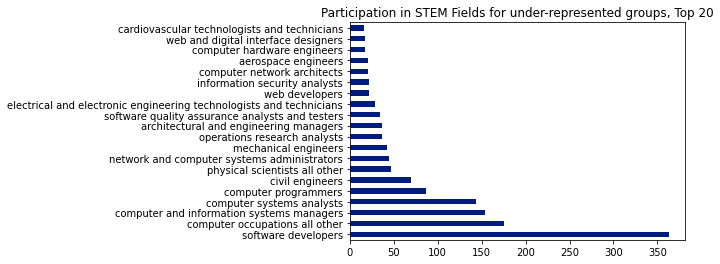

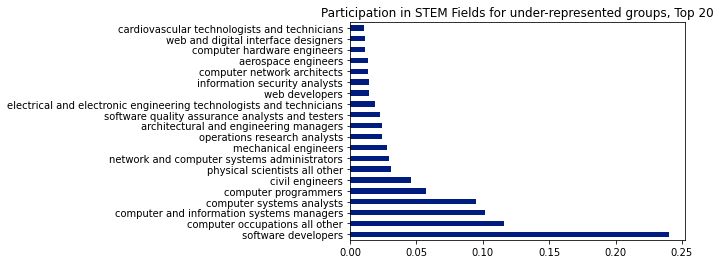

In [40]:
df[(df['stemType']!='-1') & (df['under_represented']==1)]['JobRole'].value_counts()[0:20].plot(kind='barh')
plt.title("Participation in STEM Fields for under-represented groups, Top 20")
plt.show()

df[(df['stemType']!='-1') & (df['under_represented']==1)]['JobRole'].value_counts(True)[0:20].plot(kind='barh')
plt.title("Participation in STEM Fields for under-represented groups, Top 20")
plt.show()

If we treat software developers and any other computer related fields as one broad category ("Software, Comptuing, and IT"), we get a clearer understanding of how many jobs are concentraded in software engineering:

In [38]:
df[df['stemType']!='-1']['JobRole'].value_counts(True)[0:5]

software developers                          0.198421
computer occupations all other               0.105046
computer and information systems managers    0.099897
computer systems analysts                    0.084964
computer programmers                         0.058359
Name: JobRole, dtype: float64

In [41]:
import re
r = re.compile(r'\bcomputer\b | \bsoftware\b | \bweb\b | \binformation\b', flags=re.I | re.X)
def broad_cat(role):
    if len(r.findall(role)) > 0:
        return 'Software, Computing, IT'
    return role 

df['JobRole'] = df['JobRole'].map(broad_cat)

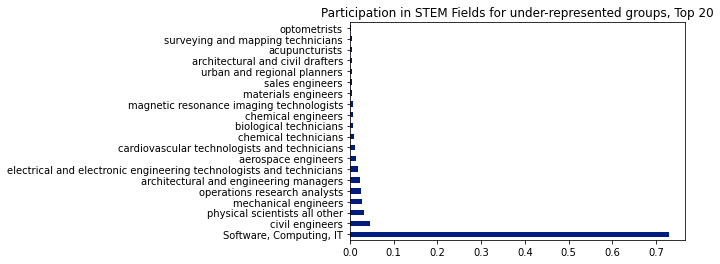

In [44]:
df[(df['stemType']!='-1') & (df['under_represented']==1)]['JobRole'].value_counts(True)[0:20].plot(kind='barh')
plt.title("Participation in STEM Fields for under-represented groups, Top 20")
plt.show()